In [ ]:
import os
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm


In [44]:
def removeFileEuropenComma(filePath: str, outputPath: str) -> None:
    with open(filePath, "r", encoding="utf-8") as fIn:
        with open(outputPath, "w", encoding="utf-8") as fOut:
            for line in fIn:
                fOut.write(line.replace(",", "."))


def getDataset(basePath: str) -> dict[int, np.ndarray[float]]:
  tempfile = "temp.csv"

  dataset = {}
  for dataFile in os.listdir(basePath):
      filePath = os.path.join(basePath, dataFile)
      removeFileEuropenComma(filePath, tempfile)

      index = int(dataFile[:-(len(".csv"))])
      dataset[index] =  np.genfromtxt(tempfile, delimiter=";", skip_header=1)

  os.remove(tempfile)

  return dataset

In [ ]:
sns.set_theme()  # plot style

plt.rcParams.update({
    "font.size":         8,
    "font.family":       "DejaVu Sans",
    "font.sans-serif":   ["Alegreya Sans", "Alegreya"],
    "figure.autolayout": True,
    "figure.dpi":        300,
    "figure.figsize":    (8, 6),
})

sns.set_palette([
    "#525174",
    "#EC7357",
    "#6DA34D",
    "#2D93AD",
    "#A3A6F1",
    "#B5566A", 
    "#FEC601",
])

In [ ]:
#other constants for preferences
POINT_SIZE = 7
VERT_LINE_COLOR = "#222222"
VERT_LINE_STYLE = "--"
VERT_LINE_WIDTH = 0.7

def plotDataset(dataset: dict[int, np.ndarray[float]]) -> None:
  for key in sorted(dataset.keys()):
    data = dataset[key]
    (x, y) = (data[:,0], data[:,1])
    plt.scatter(x, y, s= POINT_SIZE, label=f"Masa {key}")

  # Add horizontal red lines
  plt.axvline(x=1, color=VERT_LINE_COLOR, linestyle=VERT_LINE_STYLE, linewidth=VERT_LINE_WIDTH)
  plt.axvline(x=10, color=VERT_LINE_COLOR, linestyle=VERT_LINE_STYLE, linewidth=VERT_LINE_WIDTH)

  plt.xscale("log")
  plt.yscale("log")

  plt.xlabel("Szybkość Ścinania (1/s)")
  plt.ylabel("Lepkość (Pa·s)")

  plt.legend()
  plt.title("Wykres Lepkości w funkcji Szybkości Ścinania")

  plt.show()

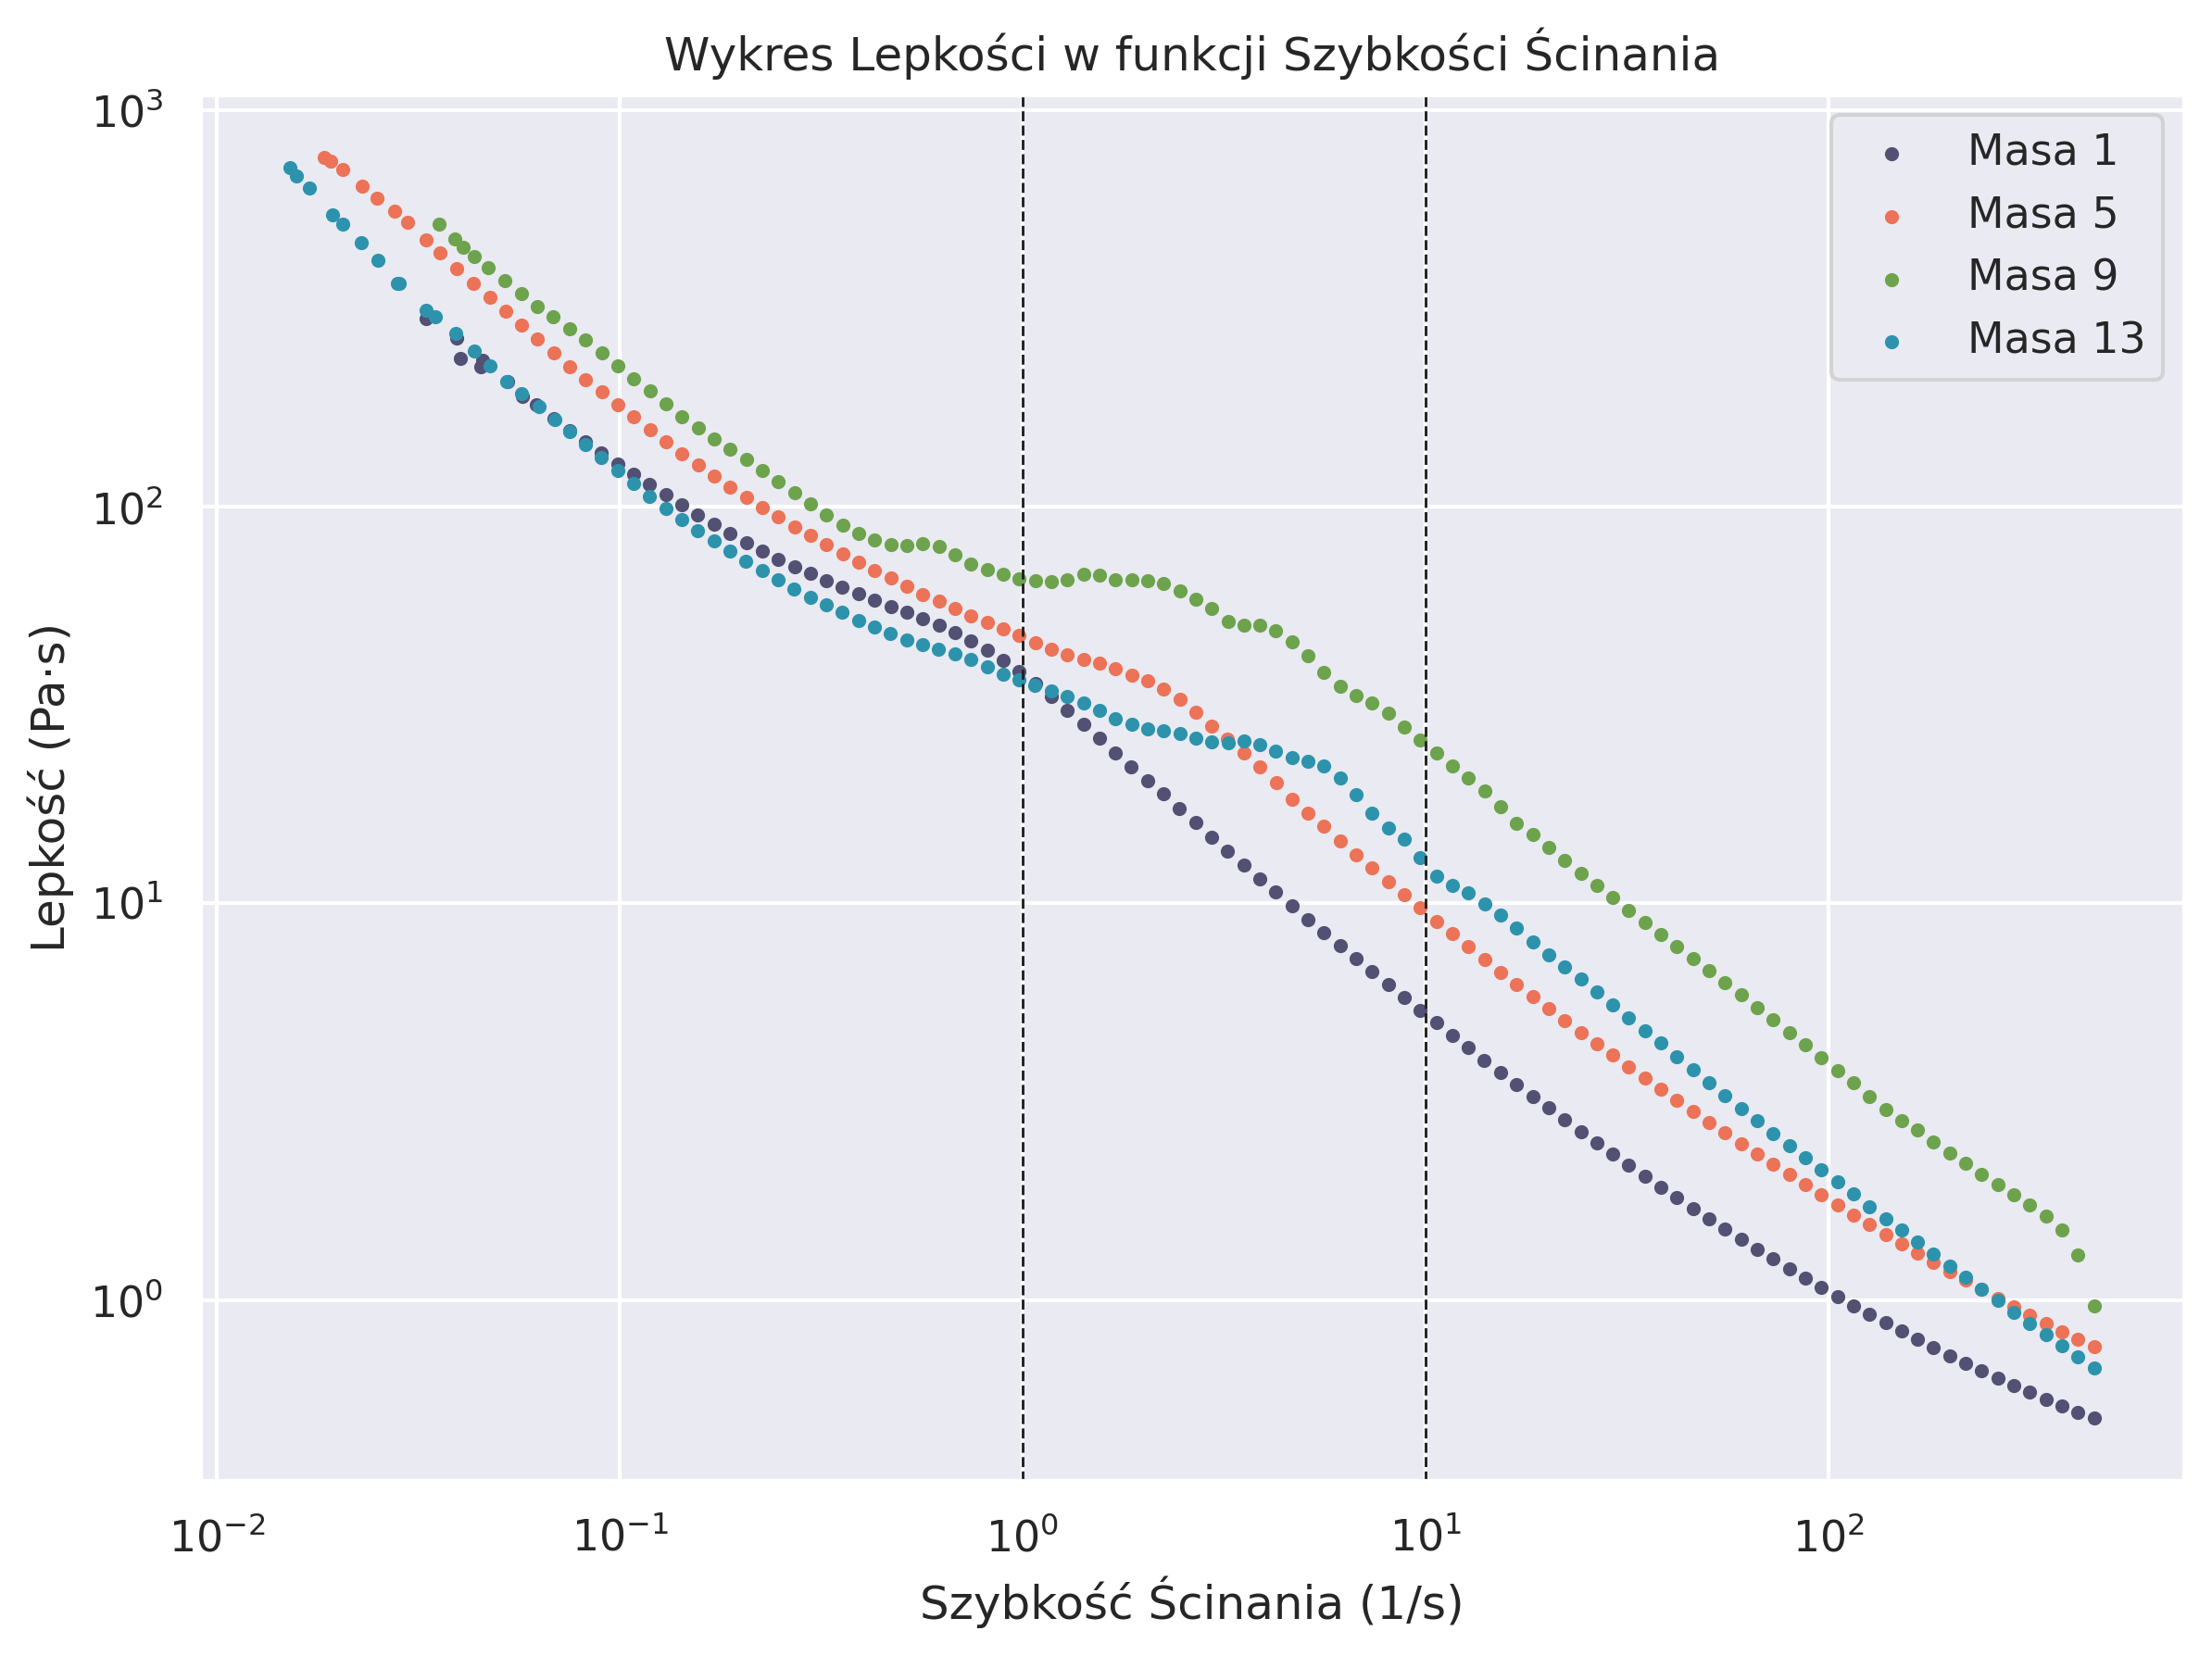

In [175]:
dataset = getDataset("datasets/dataset_A")
plotDataset(dataset)

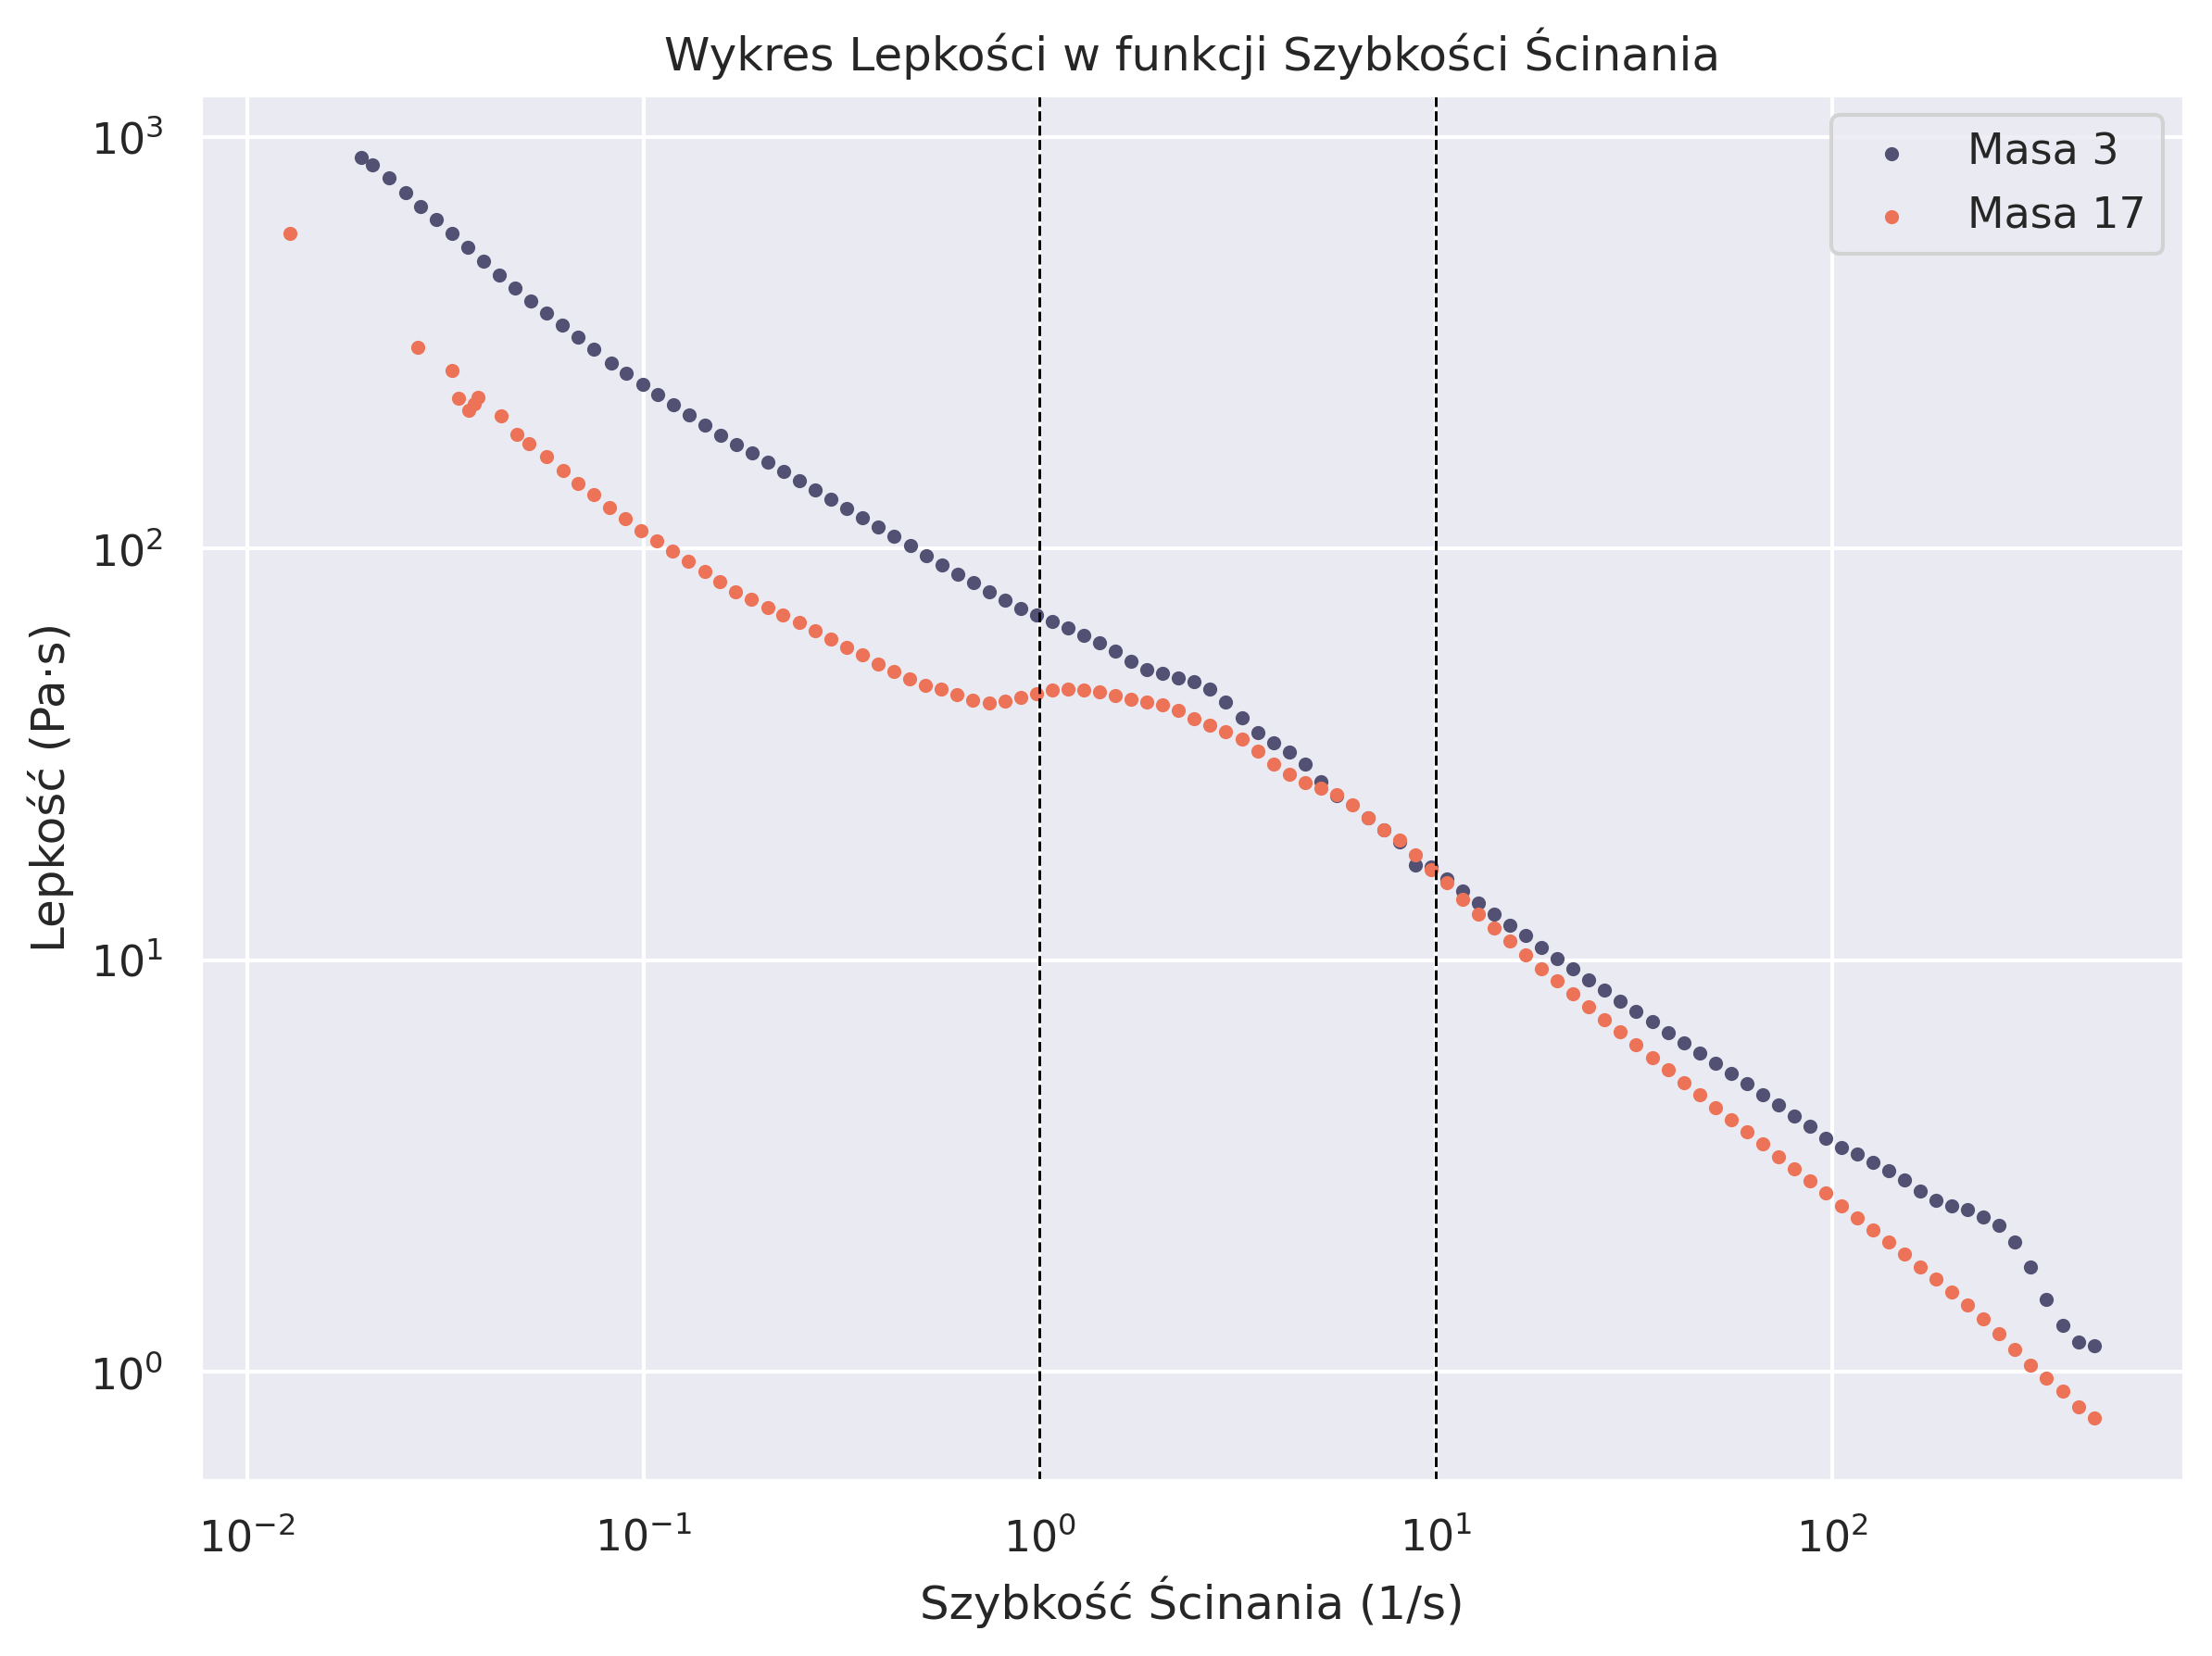

In [163]:
dataset = getDataset("datasets/dataset_B")
plotDataset(dataset)

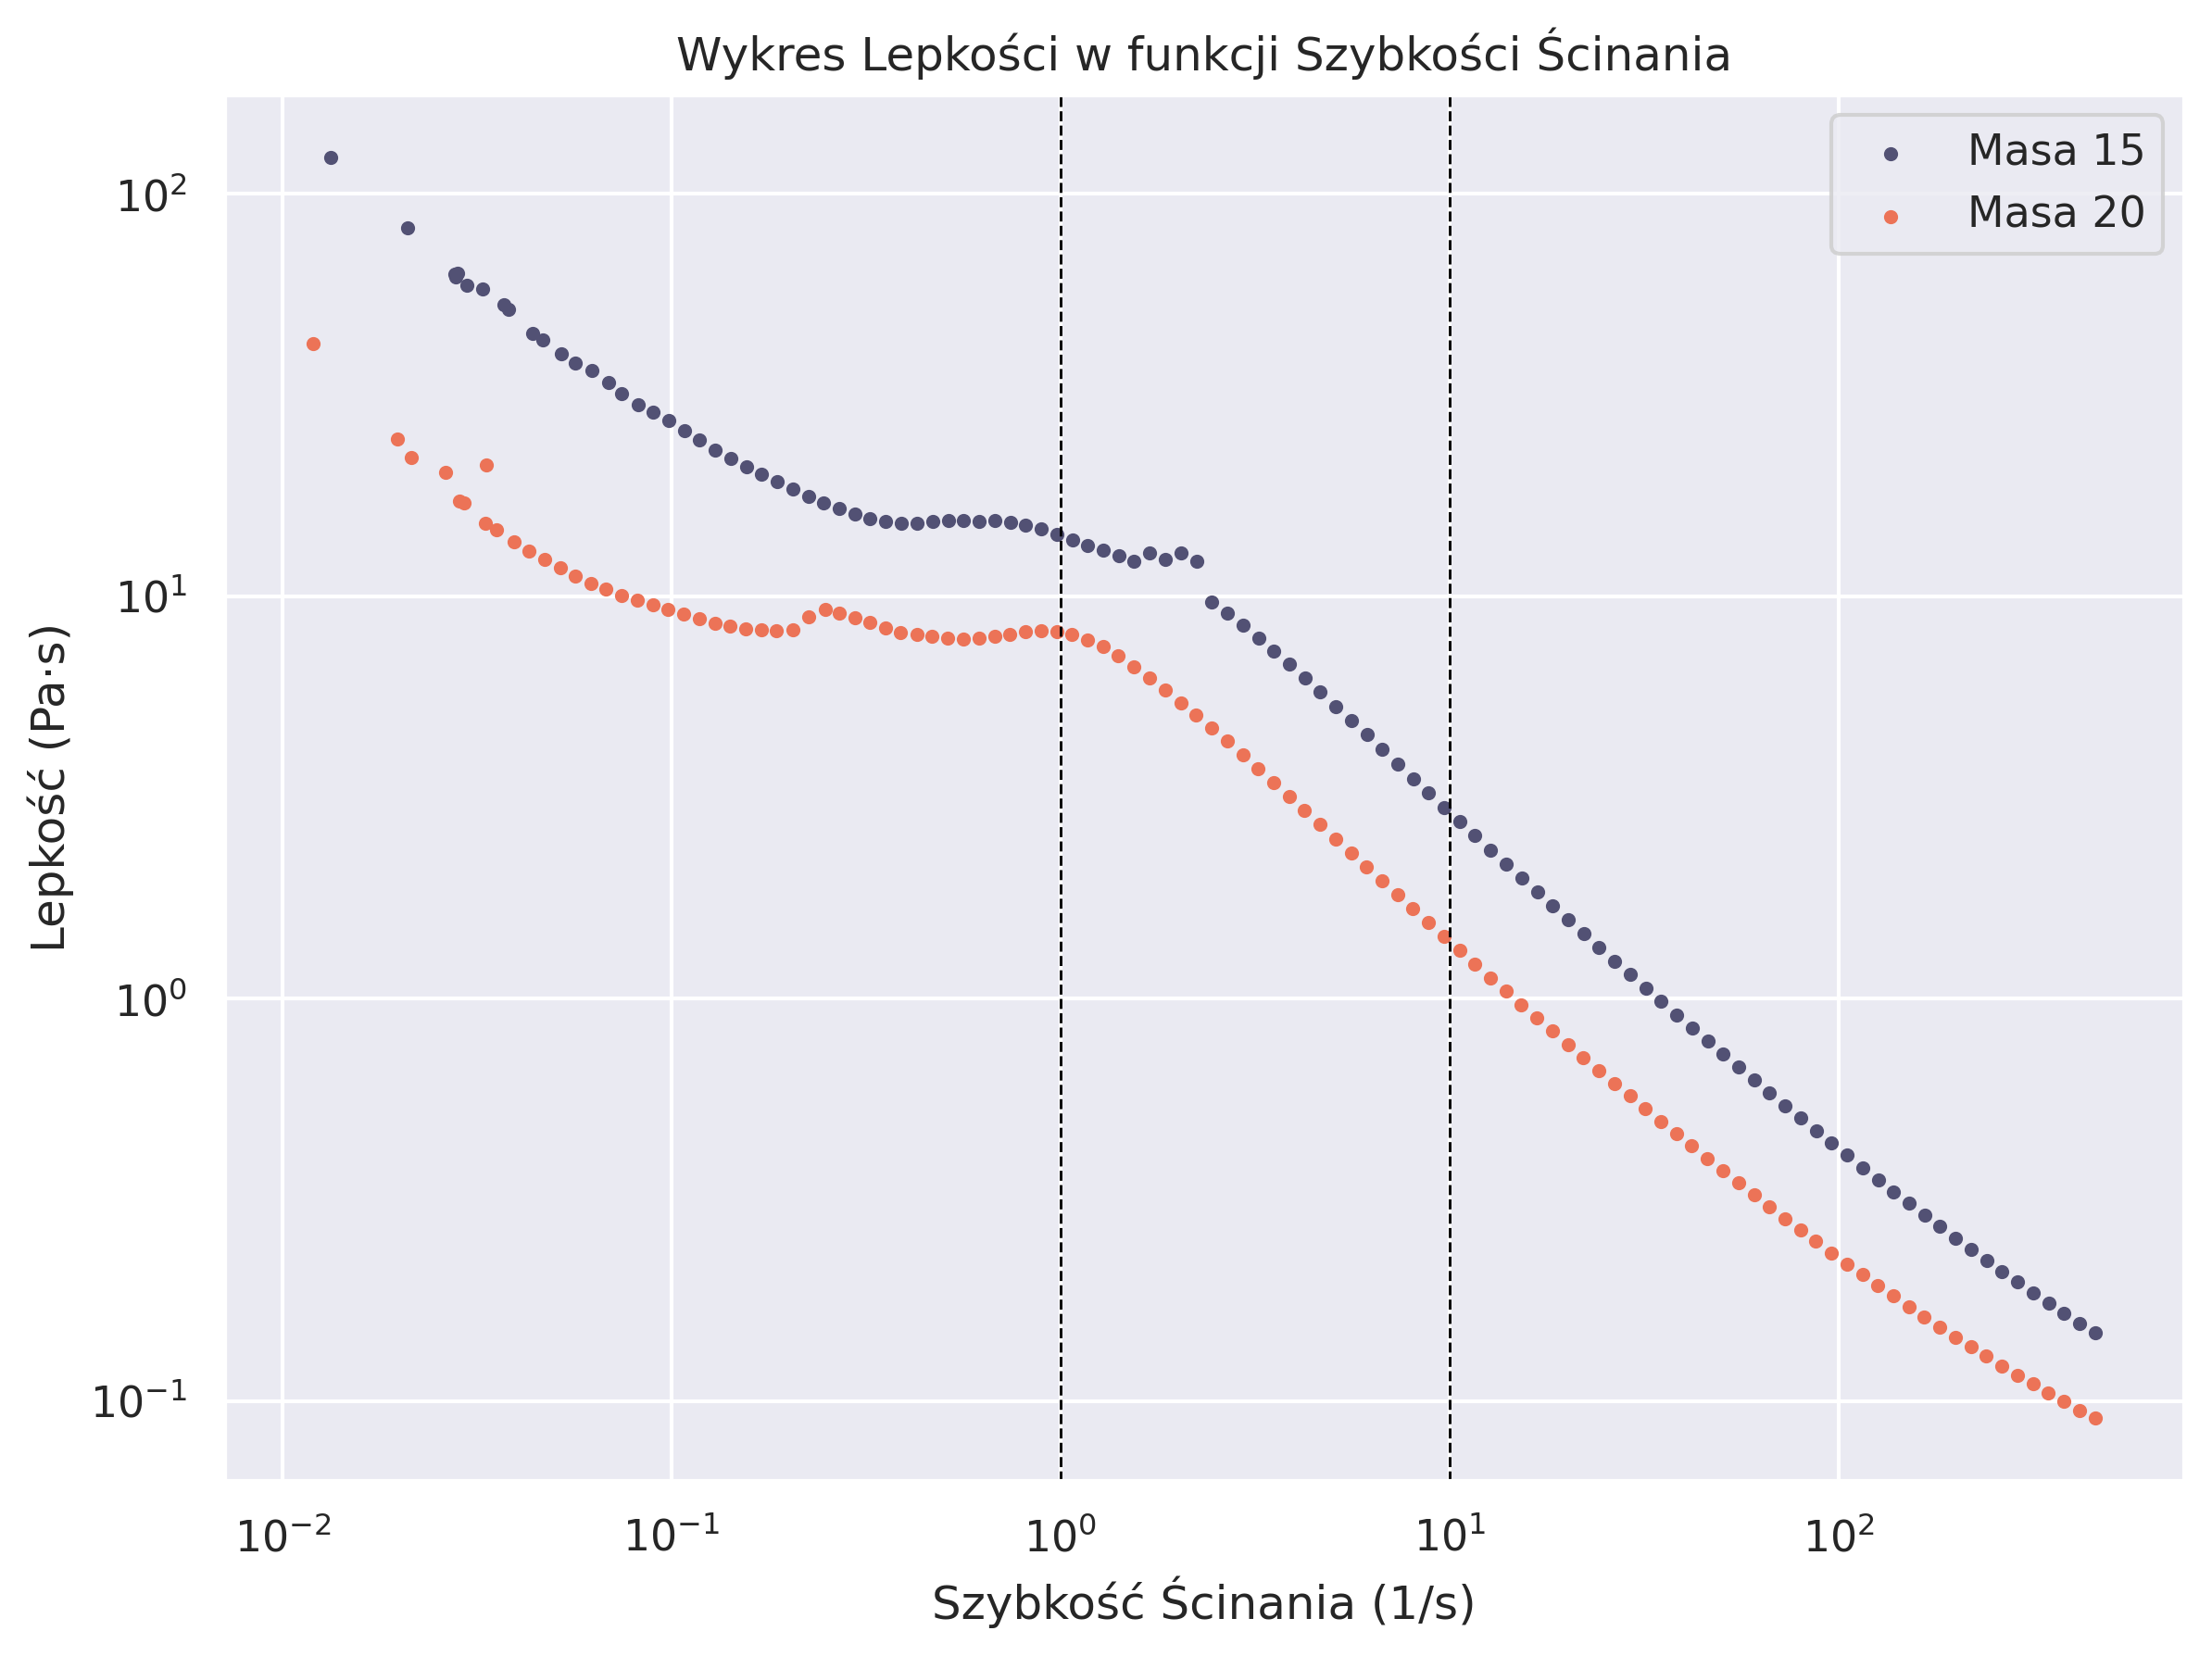

In [164]:
dataset = getDataset("datasets/dataset_C")
plotDataset(dataset)

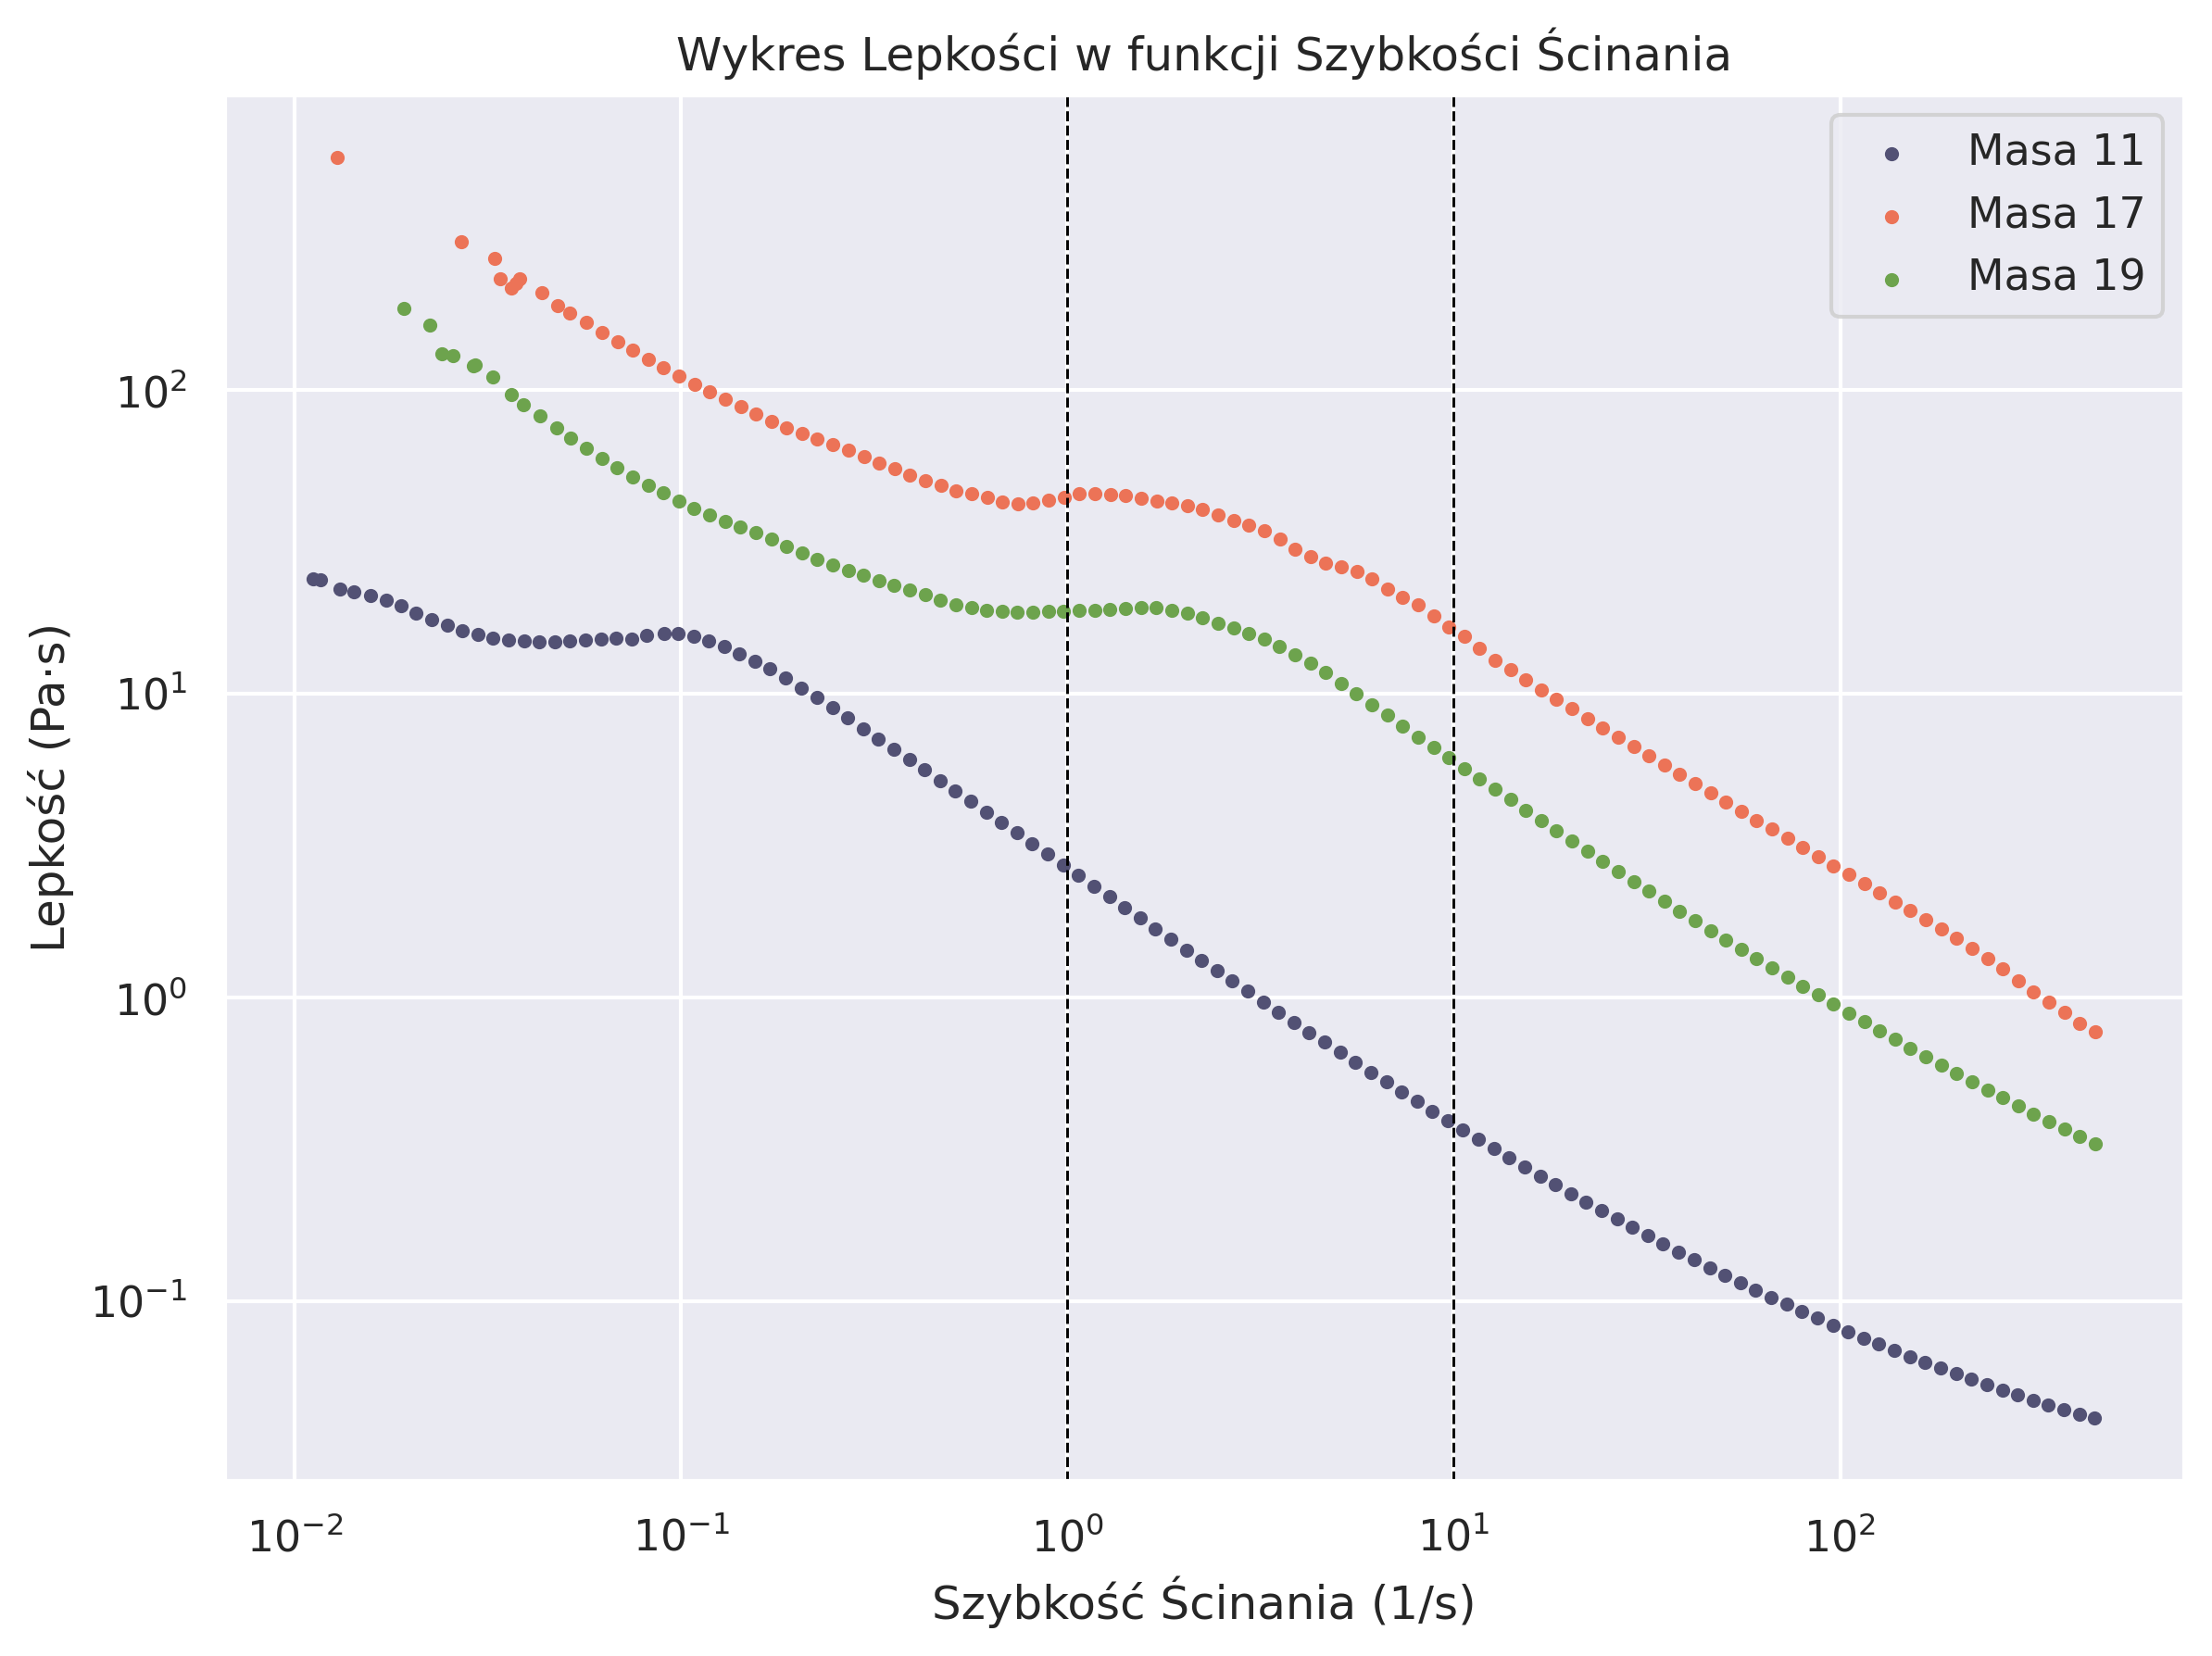

In [165]:
dataset = getDataset("datasets/dataset_D")
plotDataset(dataset)